In [107]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline

In [74]:
train = pd.read_csv('train.csv', dtype={'LotFrontage': np.float32, 'MasVnrArea': np.float32, 'GarageYrBlt': np.float32})
train.set_index('Id', inplace=True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [58]:
numeric = train._get_numeric_data().fillna(0)
numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [67]:
numeric['LotFrontage'] = numeric['LotFrontage'].replace(np.nan, 0).astype('int64')
numeric['MasVnrArea'] = numeric['MasVnrArea'].replace(np.nan, 0).astype('int64')
numeric['GarageYrBlt'] = numeric['GarageYrBlt'].replace(np.nan, 0).astype('int64')

In [75]:
numeric.dtypes

MSSubClass       int64
LotFrontage      int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
MasVnrArea       int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageYrBlt      int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

In [72]:
numeric.to_csv('train_numeric_only.csv')

In [73]:
numeric1 = pd.read_csv('train_numeric_only.csv')
numeric1.dtypes

Id               int64
MSSubClass       int64
LotFrontage      int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
MasVnrArea       int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageYrBlt      int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

In [76]:
ntrain = numeric1.drop('SalePrice', axis=1)

In [30]:
from sklearn.linear_model import LinearRegression

In [35]:
linreg = LinearRegression()

In [77]:
linreg.fit(ntrain, numeric1.SalePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [126]:
print('Y intercept = {:,.2f}'.format(linreg.intercept_))

Y intercept = 484,276.69


In [127]:
coeff = pd.DataFrame({'Variable': list(ntrain.columns), 'Coefficient Value': linreg.coef_})
coeff

,Variable,Coefficient Value
0,Id,-1.050380
1,MSSubClass,-167.265378
2,LotFrontage,8.827216
3,LotArea,0.391736
4,OverallQual,17309.407689
5,OverallCond,5112.580657
6,YearBuilt,338.099897
7,YearRemodAdd,122.085282
8,MasVnrArea,28.075088
9,BsmtFinSF1,9.547454


In [133]:
yhat = linreg.predict(ntrain)
yhat.shape

(1460,)

In [134]:
y = numeric.SalePrice.values
y.shape

(1460,)

In [138]:
linreg.score(ntrain, y.reshape(-1,1), sample_weight=None)

0.8164275651873065

Text(0.5, 1.0, 'Results vs Actual Values')

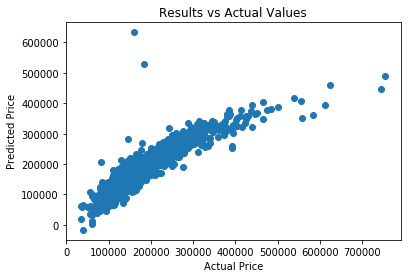

In [181]:
plt.scatter(y, yhat)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Results vs Actual Values')

Text(0.5, 1.0, 'Residual Plot')

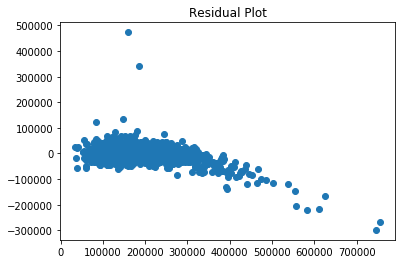

In [185]:
plt.scatter(y, (yhat-y))
plt.title('Residual Plot')

# Manual Efforts
- Attempt to create an efficient model by hand-picking a few variables

In [141]:
list(train1.columns)

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [152]:
sixvar = train1.loc[:,['OverallQual','OverallCond','LotArea','1stFlrSF','FullBath','GarageCars']]
sixvar.head()

,OverallQual,OverallCond,LotArea,1stFlrSF,FullBath,GarageCars
Id,,,,,,
1,7,5,8450,856,2,2
2,6,8,9600,1262,2,2
3,7,5,11250,920,2,2
4,7,5,9550,961,1,3
5,8,5,14260,1145,2,3


In [154]:
sixreg = LinearRegression()
sixreg.fit(sixvar, numeric1.SalePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [156]:
print('Y intercept = {:,.2f}'.format(sixreg.intercept_))

Y intercept = -140,234.37


In [158]:
sixcoeff = pd.DataFrame({'Variable': list(sixvar.columns), 'Coefficient Value': sixreg.coef_})
sixcoeff

,Variable,Coefficient Value
0,OverallQual,29520.120313
1,OverallCond,3982.380817
2,LotArea,0.819642
3,1stFlrSF,44.864522
4,FullBath,15601.731651
5,GarageCars,19071.338857


In [160]:
sixreg.score(sixvar, y, sample_weight=None)

0.7371441337639515

Text(0.5, 1.0, 'Results vs Actual Values')

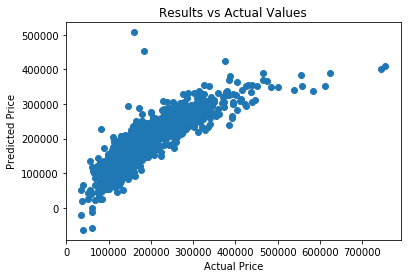

In [161]:
plt.scatter(y, sixreg.predict(sixvar))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Results vs Actual Values')

In [162]:
fivevar = train1.loc[:,['OverallQual','LotArea','1stFlrSF','FullBath','GarageCars']]
fivevar.head()

,OverallQual,LotArea,1stFlrSF,FullBath,GarageCars
Id,,,,,
1,7,8450,856,2,2
2,6,9600,1262,2,2
3,7,11250,920,2,2
4,7,9550,961,1,3
5,8,14260,1145,2,3


In [163]:
fivereg = LinearRegression()
fivereg.fit(fivevar, numeric1.SalePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [165]:
fivereg.score(fivevar, y, sample_weight=None)

0.7342239691710208

In [166]:
threevar = train1.loc[:,['OverallQual','FullBath','GarageCars']]
threevar.head()

,OverallQual,FullBath,GarageCars
Id,,,
1,7,2,2
2,6,2,2
3,7,2,2
4,7,1,3
5,8,2,3


In [167]:
threereg = LinearRegression()
threereg.fit(threevar, numeric1.SalePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [168]:
threereg.score(threevar, y, sample_weight=None)

0.6803351357444045

# Start using Standard Scaler and Log-Normalized Prices

In [171]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ntrain_scaled = scaler.fit_transform(ntrain)

array([[-1.73086488,  0.07337496,  0.2128772 , ..., -0.08768781,
        -1.5991111 ,  0.13877749],
       [-1.7284922 , -0.87256276,  0.64574726, ..., -0.08768781,
        -0.48911005, -0.61443862],
       [-1.72611953,  0.07337496,  0.29945121, ..., -0.08768781,
         0.99089135,  0.13877749],
       ...,
       [ 1.72611953,  0.30985939,  0.2417352 , ...,  4.95311151,
        -0.48911005,  1.64520971],
       [ 1.7284922 , -0.87256276,  0.29945121, ..., -0.08768781,
        -0.8591104 ,  1.64520971],
       [ 1.73086488, -0.87256276,  0.50145724, ..., -0.08768781,
        -0.1191097 ,  0.13877749]])

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

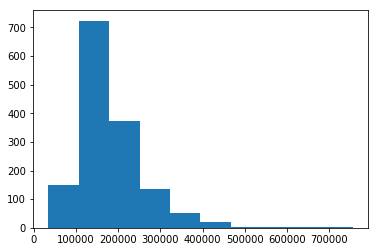

In [186]:
plt.hist(numeric1.SalePrice)

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([4.54282543, 4.67633758, 4.80984973, 4.94336188, 5.07687404,
        5.21038619, 5.34389834, 5.47741049, 5.61092265, 5.7444348 ,
        5.87794695]),
 <a list of 10 Patch objects>)

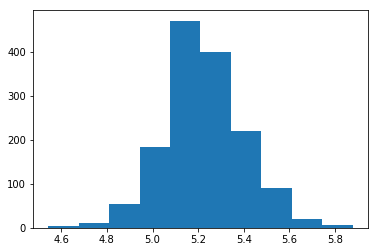

In [187]:
plt.hist(np.log10(numeric1.SalePrice))

In [188]:
logprice = np.log10(numeric1.SalePrice)

In [189]:
scalereg = LinearRegression()
scalereg.fit(ntrain_scaled, logprice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [191]:
scalereg.score(ntrain_scaled, logprice, sample_weight=None)

0.8684742068309041

In [195]:
pd.options.display.float_format = '{:,.2f}'.format

In [196]:
scaled_coeff = pd.DataFrame({'Variable': list(ntrain.columns), 'Coefficient Value': scalereg.coef_})
scaled_coeff

,Variable,Coefficient Value
0,Id,-0.00
1,MSSubClass,-0.01
2,LotFrontage,-0.00
3,LotArea,0.01
4,OverallQual,0.05
5,OverallCond,0.02
6,YearBuilt,0.04
7,YearRemodAdd,0.01
8,MasVnrArea,0.00
9,BsmtFinSF1,"-204,254,453,133.20"


In [222]:
## Based on the above we have some extremly highly corellated variables.
## Lets try to remove some of them so that the weightings make a little bit more sense

In [216]:
testreg = LinearRegression()
testreg.fit(ntrain.OverallQual.values.reshape(-1,1), logprice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [217]:
testreg.score(ntrain.OverallQual.values.reshape(-1,1), logprice, sample_weight=None)

0.6677903728940005

In [221]:
## Remove variables which are linearly correlated. 
nocorr = ntrain.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis = 1)
nocorr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65,8450,7,5,2003,2003,196,0,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80,9600,6,8,1976,1976,0,0,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68,11250,7,5,2001,2002,162,0,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60,9550,7,5,1915,1970,0,0,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84,14260,8,5,2000,2000,350,0,...,836,192,84,0,0,0,0,0,12,2008


In [224]:
nocoreg = LinearRegression()
nocoreg.fit(scaler.fit_transform(nocorr), logprice)
nocoreg.score(scaler.fit_transform(nocorr), logprice, sample_weight=None)

/Users/bhalbur/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/bhalbur/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/bhalbur/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/bhalbur/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.8651799001134941

In [229]:
nocorr_coeff = pd.DataFrame({'Variable': list(nocorr.columns), 'Coefficient Value': nocoreg.coef_*100})
nocorr_coeff

,Variable,Coefficient Value
0,Id,-0.07
1,MSSubClass,-1.56
2,LotFrontage,-0.15
3,LotArea,0.90
4,OverallQual,5.38
5,OverallCond,2.28
6,YearBuilt,4.13
7,YearRemodAdd,0.94
8,MasVnrArea,0.17
9,LowQualFinSF,-0.05


In [239]:
test = pd.read_csv('test.csv', dtype={'LotFrontage': np.float32, 'MasVnrArea': np.float32, 'GarageYrBlt': np.float32})
##test.set_index('Id', inplace=True)
## Forgot to drop index and set ID as index in training data
## Need to to the same in testing data for now but should fix later
ntest = test._get_numeric_data().fillna(0)
ntest['LotFrontage'] = ntest['LotFrontage'].replace(np.nan, 0).astype('int64')
ntest['MasVnrArea'] = ntest['MasVnrArea'].replace(np.nan, 0).astype('int64')
ntest['GarageYrBlt'] = ntest['GarageYrBlt'].replace(np.nan, 0).astype('int64')
ntest1 = ntest.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis = 1)

In [256]:
from datetime import datetime

In [266]:
datetime.now.tostring("yyyy-MM-dd-HH-mm-ss")

AttributeError: 'builtin_function_or_method' object has no attribute 'tostring'

In [267]:
## would be nice to timestamp the submission files

In [252]:
submission = pd.DataFrame({'Id': list(ntest.Id), 'SalePrice': nocoreg.predict(ntest1)})

In [253]:
submission.set_index('Id', inplace=True)

In [255]:
submission.head()

,SalePrice
Id,
1461,251.01
1462,284.09
1463,306.18
1464,271.55
1465,208.96


In [269]:
submission.to_csv('submission_files/SubmissionFile.csv')